<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/camera_hkp(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/camera_hkp/file1.parquet'
# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))
print(df.columns)

                                                                key.segment_context_name  \
index                                                                                      
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_4600_000   
454855130179746819_4580_000_4600_000;1557857070...  454855130179746819_4580_000_

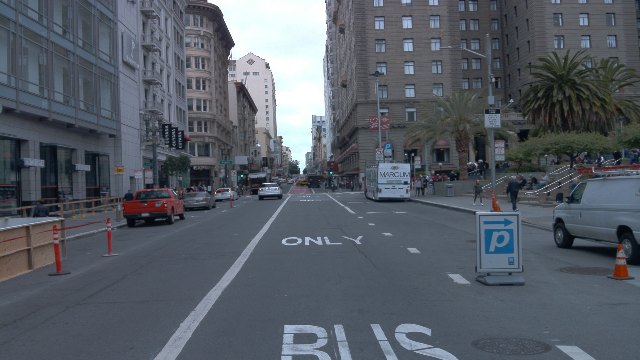

Index(['key.segment_context_name', 'key.frame_timestamp_micros',
       'key.camera_name', 'key.camera_object_id',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].type',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.visibility.is_occluded',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_3d.location_m.x',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_3d.location_m.y',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_3d.location_m.z',
       '[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_3d.visibility.is_occluded'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/training/camera_image/454855130179746819_4580_000_4600_000.parquet'

# Load the Parquet file into a Pandas DataFrame
camera_image = pd.read_parquet(parquet_file_path)

# Extract the camera image
img = camera_image.iloc[0]['[CameraImageComponent].image']

# Convert the camera image from bytes to a NumPy array
nparr = np.frombuffer(img, np.uint8)
img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

# Resize the image
resized_img = cv2.resize(img_np, (640, 360))

# Display the resized image
cv2_imshow(resized_img)
print(df.columns)


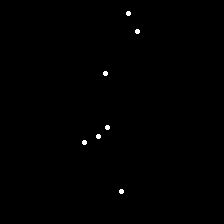

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
object_id = '0d3b459e-d23d-40af-ae90-81884876f66d'
frame_timestamp = 1557857070597727

# Filter and types
types =  [14, 8, 13, 7, 16, 1, 19, 6, 15, 5] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [1602.8680497, 1609.43342775, 1588.35726945, 1572.111722, 1597.9353318, 1582.15505565, 1586.5098687]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

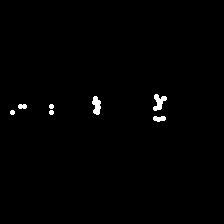

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
object_id = '0d3b459e-d23d-40af-ae90-81884876f66d'
frame_timestamp = 1557857070597727

# Filter and types
types =  [14, 8, 13, 7, 16, 1, 19, 6, 15, 5] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246 ]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

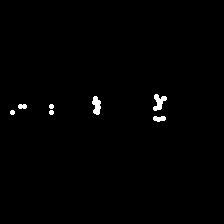

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727

# Filter and types
types =  [14, 8, 13, 7, 16, 1, 19, 6, 15, 5] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246 ]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727

# Filter and types
types =  [14, 8, 13, 7, 16, 1, 19, 6, 15, 5] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246, 1157.3549902 1160.1613551, 1408.2520124, 1407.5319998, 1414.930024,  1400.4813501, 1047.0541126,  1027.2895562, 1024.5547715, 1056.9974445, 1061.4754176, 1037.8813205, 1054.8774074, 1032.1064826, 1041.9782343, 1054.1047623, 1048.2646601, 1044.1361668, 1042.6961416, 1043.1466758, 847.00324335, 844.4295141, 851.2591073,  847.467462,   845.5684814, 841.3768291, 1151.3148845,  1146.38953515, 1150.89908775, 1159.5466075,  1146.6200655, 1162.9424564, 1776.536352,  1779.1616611, 1775.9616051, 1776.9763597, 1781.7911808, 1766.6140731, 1790.0713257]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

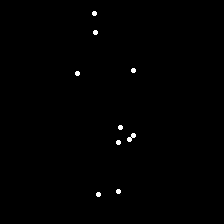

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
object_id = '0d3b459e-d23d-40af-ae90-81884876f66d'
frame_timestamp = 1557857070597727

# Filter and types
types =  [14, 8, 13, 7, 16, 1, 19, 6, 15, 5] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

In [ ]:
print(df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x'])

index
454855130179746819_4580_000_4600_000;1557857070597727    [1602.8680497, 1609.43342775, 1588.35726944999...
454855130179746819_4580_000_4600_000;1557857070597727    [1792.3166281499998, 1800.4062434, 1795.771425...
454855130179746819_4580_000_4600_000;1557857070597727    [555.1044509999999, 556.1802593, 554.0118003, ...
454855130179746819_4580_000_4600_000;1557857070597727    [1711.3373163, 1724.9396596, 1733.672444, 1733...
454855130179746819_4580_000_4600_000;1557857070597727                         [1308.0355218, 1310.0966105]
                                                                               ...                        
454855130179746819_4580_000_4600_000;1557857090221406    [487.60326975, 471.56656806, 491.14080534, 474...
454855130179746819_4580_000_4600_000;1557857090221406    [542.00148486, 502.17973535999994, 392.1681259...
454855130179746819_4580_000_4600_000;1557857090321818    [1604.47607784, 1621.68185262, 1618.5062181, 1...
454855130179746819_4580_000_460

In [ ]:
print(df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x'])
values = df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x'].values
for value in values:
    print(value)

Streaming output truncated to the last 5000 lines.
[771.9945623  772.6829954  790.5212023  788.5759051  789.0264393
 799.4160948  760.3143579  774.5777654  799.5066227  796.47604335
 787.3232516 ]
[1352.9836768  1349.4194039  1334.64756645 1326.96111615 1357.8721834
 1320.8399564  1322.8189384  1362.3859466 ]
[364.595854  367.8506478]
[123.5116351  85.2457023]
[10.6128173  5.6990471]
[1392.0727819  1385.9021476  1403.05507935 1392.2391006  1366.9944483
 1356.6174246 ]
[1157.3549902 1160.1613551]
[1408.2520124 1407.5319998 1414.930024  1400.4813501]
[1047.0541126 1027.2895562 1024.5547715 1056.9974445 1061.4754176
 1037.8813205 1054.8774074 1032.1064826 1041.9782343 1054.1047623
 1048.2646601 1044.1361668 1042.6961416 1043.1466758]
[847.00324335 844.4295141  851.2591073  847.467462   845.5684814
 841.3768291 ]
[1151.3148845  1146.38953515 1150.89908775 1159.5466075  1146.6200655
 1162.9424564 ]
[1776.536352  1779.1616611 1775.9616051 1776.9763597 1781.7911808
 1766.6140731 1790.0713257]

In [ ]:
print(df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y'])

index
454855130179746819_4580_000_4600_000;1557857070597727    [633.35529405, 654.2577650999999, 625.47936675...
454855130179746819_4580_000_4600_000;1557857070597727    [567.24045285, 578.9238152, 555.06339765, 577....
454855130179746819_4580_000_4600_000;1557857070597727    [685.4898906, 671.9464957, 698.4785389499999, ...
454855130179746819_4580_000_4600_000;1557857070597727    [655.8746355000001, 651.8808813999999, 639.956...
454855130179746819_4580_000_4600_000;1557857070597727                           [638.1627466, 646.9186893]
                                                                               ...                        
454855130179746819_4580_000_4600_000;1557857090221406    [707.249745075, 722.1840064200001, 723.5242403...
454855130179746819_4580_000_4600_000;1557857090221406    [501.1906654200001, 837.00959478, 622.305627, ...
454855130179746819_4580_000_4600_000;1557857090321818    [655.80389742, 705.6186639, 725.0110032599999,...
454855130179746819_4580_000_460

In [ ]:
print(df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y'])
values = df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y'].values
for value in values:
    print(value)

Streaming output truncated to the last 5000 lines.
[399.8469972  412.7482756  479.5283916  489.545409   523.78074495
 485.2969136  441.502463   525.9523619  439.7782223  487.6569549 ]
[533.6451281 419.3904971 592.1135197 391.5184304 381.6214151 458.2922305
 584.4628595 491.7054468 482.2210703 534.5398806]
[473.3577573  473.9282936  473.8146074  530.282964   530.598759
 588.1408186  586.0839405  402.6302038  403.4681132  437.6329216
 442.3908996  456.49746225]
[763.360727   821.9364889  700.59436545 765.0323352  620.0340083
 610.1348877  627.20992335 816.6311329 ]
[588.4776666  711.1429711  663.1800265  655.2872568  565.251997
 575.90586765 756.8869295  761.8364898 ]
[578.3974902  617.09185155 567.9530969  577.88274435 600.8547253
 565.68674145 555.1781365  579.3890865  554.4918087  578.4164379 ]
[641.7522831  579.6290907  583.71232005 630.5941931  647.3481705
 631.695265   614.9623406  614.3160135  612.0991326  603.6400372
 591.5850894 ]
[624.4214535 759.8722449 593.6630205 708.8987213

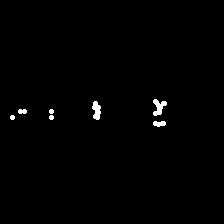

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727

# Filter and types
types = [14, 8, 13, 7, 16, 1, 19, 6, 15, 5]
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y as a list of tuples
points = list(zip(x, y))

# Calculate the center of mass of the points
center_x = sum(point[0] for point in points) / len(points)
center_y = sum(point[1] for point in points) / len(points)

# Calculate the distance of each point from the center
distances = [((point[0]-center_x)**2 + (point[1]-center_y)**2)**0.5 for point in points]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
scaled_points = [((point[0] - center_x) * scale_factor + 112, (point[1] - center_y) * scale_factor + 112) for point in points]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for point in scaled_points:
    draw.ellipse((point[0]-2, point[1]-2, point[0]+2, point[1]+2), fill='white')

# Show the image
img.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727

# Filter and types
types = [14, 8, 13, 7, 16, 1, 19, 6, 15, 5]
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y as a list of tuples
x = filtered_df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x'].values.tolist()
y = filtered_df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y'].values.tolist()

# Check if there are valid points
if x and y:
    points = list(zip(x, y))

    # Calculate the center of mass of the points
    center_x = sum(point[0] for point in points) / len(points)
    center_y = sum(point[1] for point in points) / len(points)

    # Calculate the distance of each point from the center
    distances = [((point[0]-center_x)**2 + (point[1]-center_y)**2)**0.5 for point in points]

    # Calculate the scaling factor based on the maximum distance from the center
    max_dist = max(distances)
    scale_factor = 100 / max_dist

    # Scale the coordinates to fit the image and center them
    scaled_points = [((point[0] - center_x) * scale_factor + 112, (point[1] - center_y) * scale_factor + 112) for point in points]

    # Create a new black image with the correct size
    img = Image.new('RGB', (224, 224), color='black')

    # Create a drawing context
    draw = ImageDraw.Draw(img)

    # Iterate over the key points and draw them on the image
    for point in scaled_points:
        draw.ellipse((point[0]-2, point[1]-2, point[0]+2, point[1]+2), fill='white')

    # Show the image
    img.show()

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727
object_id = "0d3b459e-d23d-40af-ae90-81884876f66d"  # Replace with the actual object ID

# Filter and types
types = [14, 8, 13, 7, 16, 1, 19, 6, 15, 5]
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y as a list of tuples
x = filtered_df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.x'].values.tolist()
y = filtered_df['[CameraHumanKeypointsComponent].camera_keypoints[*].keypoint_2d.location_px.y'].values.tolist()

# Check if there are valid points
if x and y:
    points = list(zip(x, y))

    # Calculate the center of mass of the points
    center_x = sum(point[0] for point in points) / len(points)
    center_y = sum(point[1] for point in points) / len(points)

    # Calculate the distance of each point from the center
    distances = [((point[0]-center_x)**2 + (point[1]-center_y)**2)**0.5 for point in points]

    # Calculate the scaling factor based on the maximum distance from the center
    max_dist = max(distances)
    scale_factor = 100 / max_dist

    # Scale the coordinates to fit the image and center them
    scaled_points = [((point[0] - center_x) * scale_factor + 112, (point[1] - center_y) * scale_factor + 112) for point in points]

    # Create a new black image with the correct size
    img = Image.new('RGB', (224, 224), color='black')

    # Create a drawing context
    draw = ImageDraw.Draw(img)

    # Iterate over the key points and draw them on the image
    for point in scaled_points:
        draw.ellipse((point[0]-2, point[1]-2, point[0]+2, point[1]+2), fill='white')

    # Show the image
    img.show()

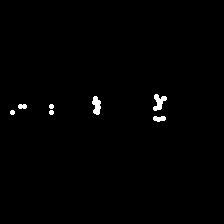

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727
object_id = '102e8cd2-e129-4167-8b5c-de55a8bde39f'

# Filter and types
types =  [5, 13, 19, 1] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246 ]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

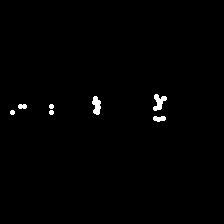

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727
object_id = '102e8cd2-e129-4167-8b5c-de55a8bde39f'

# Filter and types
types =  [5, 13, 19, 1] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246 ]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

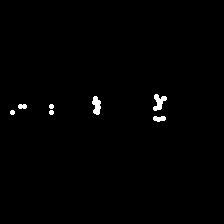

UnidentifiedImageError: ignored

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727
object_id = '102e8cd2-e129-4167-8b5c-de55a8bde39f'

# Filter and types
types =  [5, 13, 19, 1] 
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623,  772.6829954,  790.5212023,  788.5759051,  789.0264393, 799.4160948,  760.3143579,  774.5777654, 799.5066227,  796.47604335, 787.3232516, 1352.9836768,  1349.4194039,  1334.64756645, 1326.96111615, 1357.8721834, 1320.8399564,  1322.8189384, 1362.3859466, 364.595854,  367.8506478, 123.5116351,  85.2457023, 10.6128173,  5.6990471, 1392.0727819,  1385.9021476,  1403.05507935, 1392.2391006,  1366.9944483, 1356.6174246 ]
y = [399.8469972,  412.7482756, 479.5283916,  489.545409,   523.78074495, 485.2969136,  441.502463,   525.9523619,  439.7782223,  487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305, 584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757,  473.9282936,  473.8146074, 530.282964,  530.598759, 588.1408186,  586.0839405,  402.6302038,  403.4681132,  437.6329216, 442.3908996,  456.49746225, 763.360727,  821.9364889,  700.59436545, 765.032335,  620.0340083, 610.1348877,  627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i]-center_x)**2 + (y[i]-center_y)**2)**0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Show the image
img.show()

# Read the image file
image_path = '/content/drive/MyDrive/training/camera_image/454855130179746819_4580_000_4600_000.parquet'
image = Image.open(image_path)

# Create a drawing context on the image
draw = ImageDraw.Draw(image)

# Iterate over the points and draw them on the image using the same coordinates
for i in range(len(x)):
    draw.ellipse((x[i]-2, y[i]-2, x[i]+2, y[i]+2), fill='white')

# Save the modified image with the marked points
output_image_path = '/content/drive/MyDrive/training/camera_image/454855130179746819_4580_000_4600_000_marked.png'
image.save(output_image_path)

In [ ]:
import pandas as pd
from PIL import Image, ImageDraw

# Read the parquet file
df = pd.read_parquet('/content/drive/MyDrive/training/camera_hkp/file1.parquet')
frame_timestamp = 1557857070597727
object_id = '102e8cd2-e129-4167-8b5c-de55a8bde39f'

# Filter and types
types = [5, 13, 19, 1]
filtered_df = df.loc[df['[CameraHumanKeypointsComponent].camera_keypoints[*].type'].apply(lambda x: set(x) == set(types))]
filtered_df = filtered_df.loc[filtered_df['key.frame_timestamp_micros'] == frame_timestamp]
filtered_df = filtered_df.loc[filtered_df['key.camera_object_id'] == object_id]

# Get the values of x and y
x = [771.9945623, 772.6829954, 790.5212023, 788.5759051, 789.0264393, 799.4160948, 760.3143579, 774.5777654,
     799.5066227, 796.47604335, 787.3232516, 1352.9836768, 1349.4194039, 1334.64756645, 1326.96111615,
     1357.8721834, 1320.8399564, 1322.8189384, 1362.3859466, 364.595854, 367.8506478, 123.5116351,
     85.2457023, 10.6128173, 5.6990471, 1392.0727819, 1385.9021476, 1403.05507935, 1392.2391006,
     1366.9944483, 1356.6174246]
y = [399.8469972, 412.7482756, 479.5283916, 489.545409, 523.78074495, 485.2969136, 441.502463, 525.9523619,
     439.7782223, 487.6569549, 533.6451281, 419.3904971, 592.1135197, 391.5184304, 381.6214151, 458.2922305,
     584.4628595, 491.7054468, 482.2210703, 534.5398806, 473.357757, 473.9282936, 473.8146074, 530.282964,
     530.598759, 588.1408186, 586.0839405, 402.6302038, 403.4681132, 437.6329216, 442.3908996,
     456.49746225, 763.360727, 821.9364889, 700.59436545, 765.032335, 620.0340083, 610.1348877,
     627.20992335, 816.6311329]

# Calculate the center of mass of the points
center_x = sum(x) / len(x)
center_y = sum(y) / len(y)

# Calculate the distance of each point from the center
distances = [((x[i] - center_x) ** 2 + (y[i] - center_y) ** 2) ** 0.5 for i in range(len(x))]

# Calculate the scaling factor based on the maximum distance from the center
max_dist = max(distances)
scale_factor = 100 / max_dist

# Scale the coordinates to fit the image and center them
x = [(i - center_x) * scale_factor + 112 for i in x]
y = [(i - center_y) * scale_factor + 112 for i in y]

# Create a new black image with the correct size
img = Image.new('RGB', (224, 224), color='black')

# Create a drawing context
draw = ImageDraw.Draw(img)

# Iterate over the key points and draw them on the black image
for i in range(len(x)):
    draw.ellipse((x[i] - 2, y[i] - 2, x[i] + 2, y[i] + 2), fill='white')

# Read the image file
image_path = '/content/drive/MyDrive/training/camera_image/454855130179746819_4580_000_4600_000.parquet'
table = pd.read_parquet(image_path)
image_data = table.to_pandas()

# Create an image from the image data
image = Image.fromarray(image_data)

# Resize the image to match the size of the black image
image = image.resize((224, 224))

# Create a drawing context on the resized image
draw = ImageDraw.Draw(image)

# Iterate over the key points and draw them on the image
for i in range(len(x)):
    draw.ellipse((x[i] - 2, y[i] - 2, x[i] + 2, y[i] + 2), fill='white')

# Show the marked image
image.show()